# Basic Linear Systems - Tutorial

**Part 2:** Correlation

In [110]:
# Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.signal as s

### II. Correlation

Let us illustrate the concept in a simple way

** II.1 The correlation function ** 

Correlations are almost always about two functions, let s call them $f$ and $g$

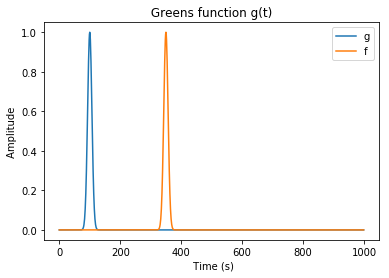

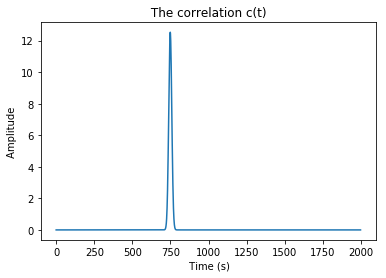

In [111]:
# Let is initialize a time-dependendt function with a peak
n = 1000                  # Number of time steps 
t = np.arange( n)
g = np.zeros(n)            # Function 1
f = np.zeros(n)            # Function 1

# Let us define an (arbitrary)input function 1
a = 10              # Gaussian half width
t0 = 100              # Gaussian shifted away from 0, peak at t0
g = np.exp(-1./a**2 * (t-t0)**2)

# Let us define an (arbitrary)input function 2
a = 10            # Gaussian half width
t0 = 350           # Gaussian shifted away from 0, peak at t0
f = np.exp(-1./a**2 * (t-t0)**2)

# Use scipy to calculate correlation FUNCTION
c = s.correlate(g,f)

# Let us plot all functions
plt.plot(t,g,t,f)
plt.title(' Greens function g(t) ' )
plt.xlabel(' Time (s)')
plt.ylabel(' Amplitude ')
plt.legend(('g','f'))
plt.show()

plt.plot(c)
plt.title(' The correlation c(t) ' )
plt.xlabel(' Time (s)')
plt.ylabel(' Amplitude ')
plt.show()



What is the signficance? Note that the correlation has twice as many points! You could no automatically extract the shift between the signals in g and f, here is a way to do it! Change the t0 values at the top and see whether it is true!

In [112]:
# We need the "zero-lag" point which is half the number of elements in c
ic = int(np.size(c)/2) 

# Now let us extract the index where the peak is in the correlation
imax = np.argmax(c)

# Calculate shift
ishift = ic-imax

print(' g and f are shifted by imax = ',ishift)
print(' Ain t that cool! ')

 g and f are shifted by imax =  250
 Ain t that cool! 


** II.2 The correlation coefficient ** 

Correlations are almost always about two functions, let s call them $f$ and $g$. The correlation coefficient (cc) is a scalar value that tells you whether the two functions f and g are identical (cc = 1), they are identical but flipped in sign (cc = -1, this anticorrelated), or do not have much in common (cc close to 0). Let s give some examples: 

In [113]:
# Let us calculate the cc of g and f as defined

print(' CC of g and f :', np.corrcoef(g,f)[0,1])
print(' CC of g and f :', np.corrcoef(g,g)[0,1])
print(' CC of g and f :', np.corrcoef(g,-g)[0,1])

 CC of g and f : -0.0257107558213
 CC of g and f : 1.0
 CC of g and f : -1.0


Can you interpret these results? Note that despite the cc of f and g is close to zero, their shapes are identical, but they are shifted!

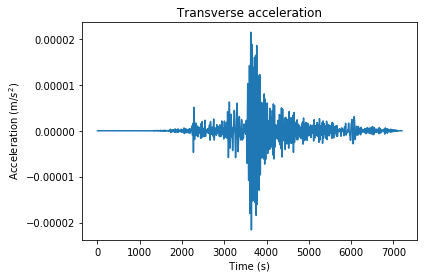

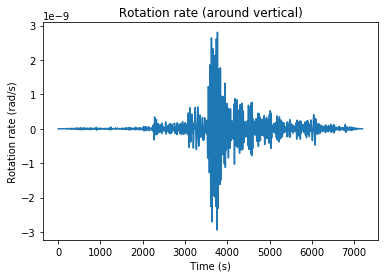

In [114]:
# Let us load two seismograms
# Transverse acceleration (seismometer) recorded at Wettzell following the Papua New Guinea earthquake 2019
at = np.load('at.npy')

# Rotation rate  (ring laser) recorded at Wettzell following the Papua New Guinea earthquake 2019
rz = np.load('rz.npy')

# Let us initialize the time sampling rate is 10Hz, thus dt = 0.1s
dt = 0.1  # sampling interval
t = np.arange(np.size(at))*dt

# Let us plot them

plt.plot(t,at)
plt.title(' Transverse acceleration ')
plt.xlabel(' Time (s) ')
plt.ylabel(' Acceleration (m/$s^2$)')
plt.show()

plt.plot(t,rz)
plt.title(' Rotation rate (around vertical) ')
plt.xlabel(' Time (s) ')
plt.ylabel(' Rotation rate (rad/s) ')
plt.show()

** Question: ** Are they correlated? Do they have similar waveforms? Let us first look by hand and superimpose the signals!

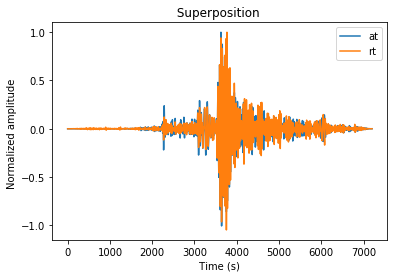

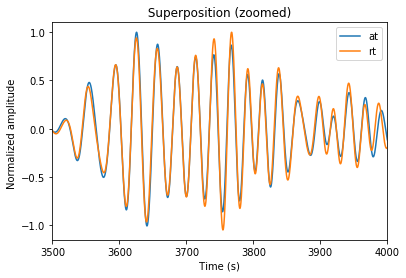

In [115]:
# For that we normalize them 

at  = at/np.max(at)
rz  = rz/np.max(rz)

plt.plot(t,at,t,rz)
plt.title(' Superposition  ')
plt.xlabel(' Time (s) ')
plt.ylabel('Normalized amplitude ')
plt.legend(('at','rt'))
plt.show()

plt.plot(t,at,t,rz)
plt.title(' Superposition (zoomed) ')
plt.xlabel(' Time (s) ')
plt.ylabel('Normalized amplitude ')
plt.legend(('at','rt'))
plt.xlim(3500,4000)
plt.show()


** WOW! ** They look really similar! Can we quantify that?

In [116]:
# Let us calculate the correlation coefficient for the entire seismogram
print(' CC of rz and at :', np.corrcoef(at,rz)[0,1])

 CC of rz and at : 0.879048673215


That is pretty good! What if we focus in the same zoomed window?

In [117]:
# Let us calculate the correlation coefficient for the entire seismogram
print(' CC of rz and at :', np.corrcoef(at[np.int(3500/dt):np.int(4000/dt)],rz[np.int(3500/dt):np.int(4000/dt)])[0,1])

 CC of rz and at : 0.984292167811


That is even better! This means QUANTITATIVELY that the two signals are almost identical! It is interesting to note that these signals were recorded with entirely different physical principles and are two different wavefield properties!

** Finally! ** What if we zoome in at the beginning of the seismograms (notably the noise). What is the cc then?

In [118]:
# Let us calculate the correlation coefficient for the entire seismogram
print(' CC of rz and at :', np.corrcoef(at[np.int(1/dt):np.int(300/dt)],rz[np.int(1/dt):np.int(300/dt)])[0,1])

 CC of rz and at : 0.162852680194


Very low! That makes sense, before the earthquake signal arrives the two observations are not correlated.  